# Evolutionary Strategy Algorithms

Ce notebook à pour but de présenter l'implémentation en python de plusieurs méthodes d'apprentissage de valeurs optimales grâces aux algorithmes de stratégie d'évolution. Ici seront présentésEvolution Strategies for Reinforcement Learning (ES-RL)  les algorithmes suivants : 
- Naive (1+1)-ES
- Naive (1+1)-ES, 1/5th rule
- ($\mu=$1,$\lambda=$n)-ES
- ($\mu=$m,$\lambda=$n)-ES
- ($\mu=$m + $\lambda=$n)-ES
- Cross-Entropy Method (CEM)
- Co-variance Matrix Adaptation Evolution Strategy (CMA-ES) **en cours**

Ensuite une présentation des algorithmes ES pour traiter des problèmes liés aux environements RL tel que CartPole, Walker2D ou encore FlappyBird.
- Evolution Strategies for Reinforcement Learning (ES-RL) 
- Novelty Search Evolution Strategies for Reinforcement Learning (NS ES-RL) **en cours**

Source : 
- https://fr.wikipedia.org/wiki/Strat%C3%A9gie_d%27%C3%A9volution
- https://lilianweng.github.io/posts/2019-09-05-evolution-strategies/#openai-es-for-rl (blog sur les algos présentés)
- https://arxiv.org/pdf/1703.03864.pdf (ES-RL)
- https://www.sfu.ca/~ssurjano/schaffer2.html (fonction schaffer en 2D)
- https://arxiv.org/pdf/1712.06560.pdf (NS ES-RL)

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

## Algorithme 1 : Naive (1+1)-ES

Soit la fonction $f$ convexe à minimiser tel que $f(x) = x^2 + x + 1$. C'est un polynome de second degré, donc le minimum se situe en $\frac{-b}{2a}$, donc $-\frac{1}{2}$.

In [2]:
def f(x) :
    return x**2 + x + 1

Affichons cette fonction, ainsi que la valeur optimale que nous voulons approcher : $-\frac{1}{2}$.

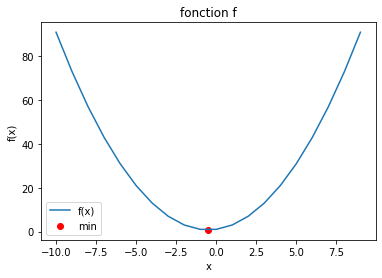

In [3]:
x = np.arange(-10,10,1)
min_f = -1 / 2
plt.figure()
plt.title("fonction f")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x),label="f(x)")
plt.scatter(min_f,f(min_f),color="r",label="min")
plt.legend()
plt.show()

Appliquons notre premier algorithme pour trouver le minimum de la fonction $f$.

Les hypers-paramètres

In [4]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants

L'algorithme (1+1)-ES

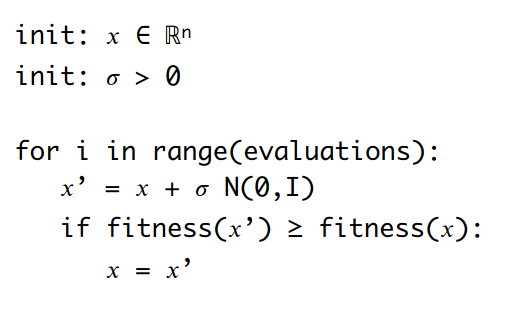

In [5]:
# Initialisation
x_init = -10 # on initialise la première valeur à -10
list_values_algo_1 = []

x = x_init
for i in range(NB_EVALUATION):
    new_x = x + np.random.normal(0,SIGMA)
    if f(new_x) <= f(x) :
        x = new_x
    list_values_algo_1.append(x)

print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

Valeur -0.50023 atteinte en 1000 itérations


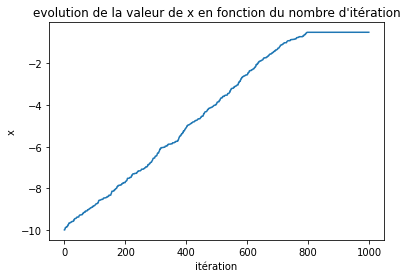

In [6]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_1)
plt.show()

## Algorithme 2 : Naive (1+1)-ES algorithm, 1/5th rule

Les hypers-paramètres

In [7]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants

L'algorithme :

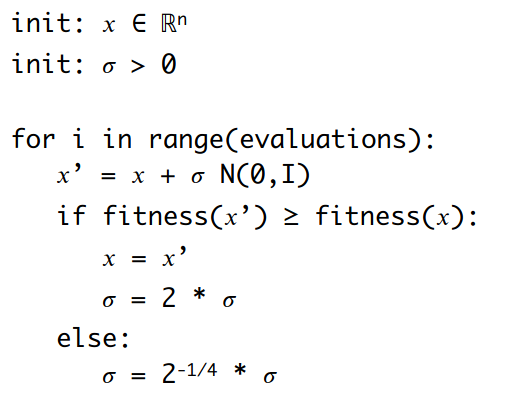

In [8]:
# Initialisation
x_init = -10 # on initialise la première valeur à -10
list_values_algo_2 = []

x = x_init
for i in range(NB_EVALUATION):
    new_x = x + np.random.normal(0,SIGMA)
    if f(new_x) <= f(x) :
        x = new_x
        SIGMA *= 2
    else :
        SIGMA *= 2**(-1/4)
    list_values_algo_2.append(x)
    
print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

Valeur -0.5 atteinte en 1000 itérations


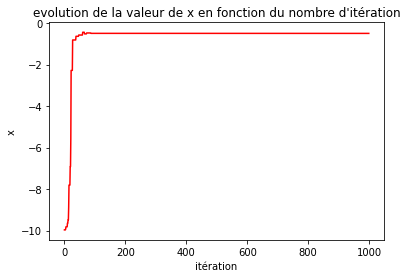

In [9]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_2,color="r")
plt.show()

On remarque alors que la deuxième version avec la variance adaptative converge beaucoup plus vite.

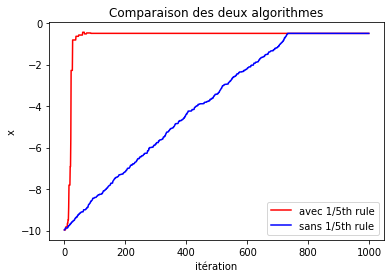

In [10]:
Evolution Strategies for Reinforcement Learning (ES-RL) plt.figure()
plt.title("Comparaison des deux algorithmes")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_2,color="r",label="avec 1/5th rule")
plt.plot(list_values_algo_1,color="b",label="sans 1/5th rule")
plt.legend()
plt.show()

## Algorithme ($\mu=$1,$\lambda=$n)-ES

Les hypers-paramètres

In [11]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
MU = 1 # nombre de meilleurs individus à séléctionner à chaque évolution
LAMBDA = 100 # nombre d'enfants à générer à partir des parents

L'algorithme :

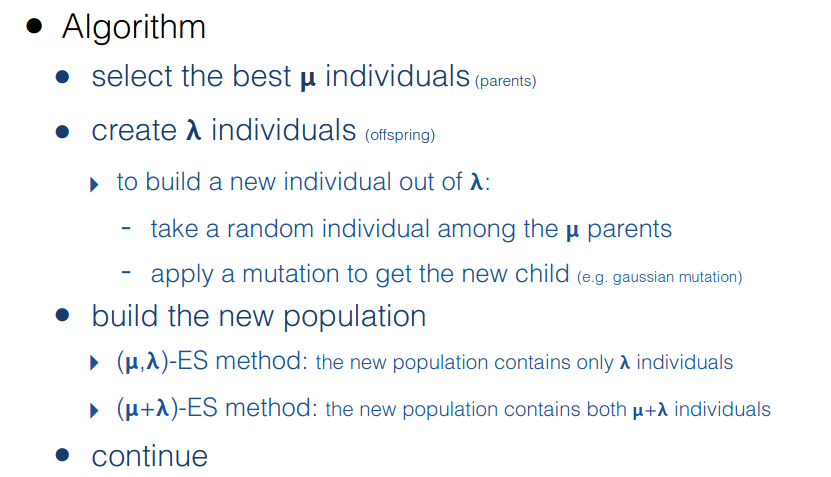

In [12]:
# Initialisation
x_init = -10 # on initialise la première valeur à -10
list_values_algo_3 = []

x = x_init
for i in tqdm(range(NB_EVALUATION)):
    new_x_values = np.asarray([x + np.random.normal(0,SIGMA) for _ in range(LAMBDA)] , dtype=np.float32)
    # choisir le meilleur individu
    x_index = np.argmin(f(new_x_values))
    x = new_x_values[x_index]
    list_values_algo_3.append(x)
    
print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2176.76it/s]

Valeur -0.5000399947166443 atteinte en 1000 itérations


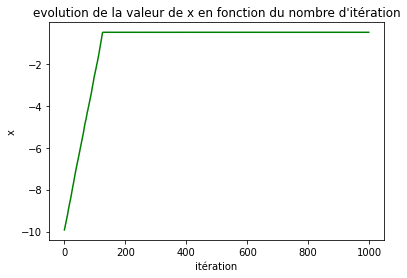

In [13]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_3,color="g")
plt.show()

## Algorithme ($\mu$=m,$\lambda$=n)-ES

Les hypers-paramètres

In [14]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
MU = 10 # nombre de meilleurs individus à séléctionner à chaque évolution
LAMBDA = 100 # nombre d'enfants à générer à partir des parents

In [15]:
# Initialisation
list_values_algo_4 = []

# génération de LAMBDA individus avec une valeur autour de -10
x = np.asarray([-10 + np.random.normal(0,SIGMA) for j in range(LAMBDA)], dtype=np.float32)

for i in tqdm(range(NB_EVALUATION)):
    
    # choisir les meilleurs individus
    x_index_values = sorted(range(len(x)), key=lambda i: f(x)[i],reverse=True)[-MU:] # np.argmin(f(new_x_values))
    
    x = np.asarray([x[x_index] for x_index in x_index_values],dtype=np.float32)
    
    list_values_algo_4.append(np.min(x))
    
    # Création des LAMBDA individus avec les parents dans x :
    x = np.asarray([random.choices(x)[0] + np.random.normal(0,SIGMA) for j in range(LAMBDA)], dtype=np.float32)
    
x = list_values_algo_4[-1]
print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1111.42it/s]

Valeur -0.502590000629425 atteinte en 1000 itérations


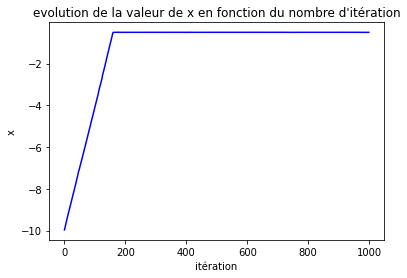

In [16]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_4,color="b")
plt.show()

## Algorithme ($\mu$=m + $\lambda$=n)-ES

Les hypers-paramètres

In [17]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
MU = 10 # nombre de meilleurs individus à séléctionner à chaque évolution
LAMBDA = 100 # nombre d'enfants à générer à partir des parents

In [18]:
# Initialisation
list_values_algo_5 = []

# génération de LAMBDA individus avec une valeur autour de -10
x = np.asarray([-10 + np.random.normal(0,SIGMA) for j in range(LAMBDA)], dtype=np.float32)

for i in tqdm(range(NB_EVALUATION)):
    
    # choisir les meilleurs individus
    x_index_values = sorted(range(len(x)), key=lambda i: f(x)[i],reverse=True)[-MU:]
    
    x = np.asarray([x[x_index] for x_index in x_index_values],dtype=np.float32)
    
    list_values_algo_5.append(np.min(x))
    
    # Création des LAMBDA individus avec les parents dans x :
    new_x_values = np.asarray([random.choices(x)[0] + np.random.normal(0,SIGMA) for j in range(LAMBDA)], dtype=np.float32)
    
    x = np.concatenate((x,new_x_values))
    
x = list_values_algo_5[-1]
print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1053.84it/s]

Valeur -0.5001999735832214 atteinte en 1000 itérations


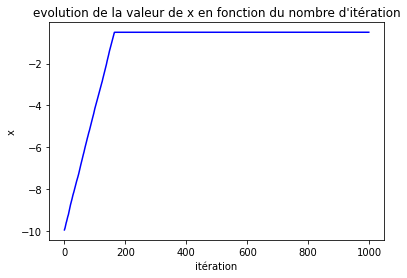

In [19]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_5,color="b")
plt.show()

## Cross-Entropy Method (CEM)

Les hypers-paramètres

In [20]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
NB_CHILD = 20 # Nombre d'enfants a générer
RO = 0.1 # proportion de meilleurs solutions à utiliser pour la mise a jour -> 10%

L'algorithme :

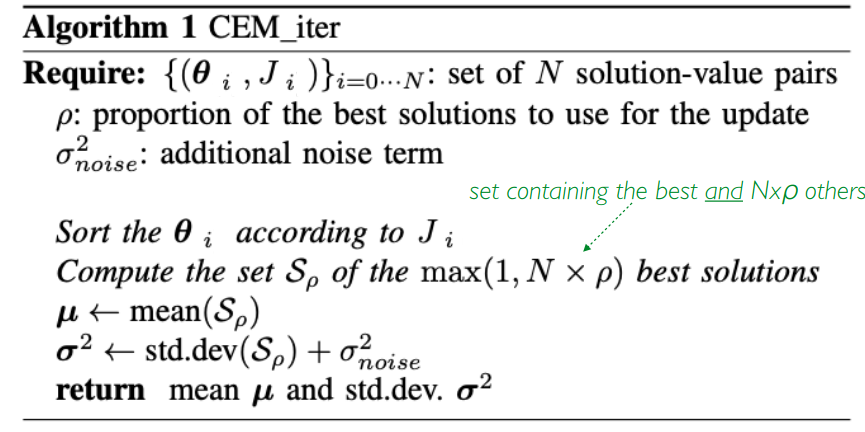

In [21]:
# Initialisation
list_values_algo_6 = []

# génération de NB_CHILD individus avec une valeur autour de -10
x = np.asarray([-10 + np.random.normal(0,SIGMA) for j in range(NB_CHILD)], dtype=np.float32)

for i in tqdm(range(NB_EVALUATION)):

    # choisir les meilleurs individus
    x_index_values = sorted(range(len(x)), key=lambda i: f(x)[i],reverse=True)[-int(len(x)*RO):]
    
    x = np.asarray([x[x_index] for x_index in x_index_values],dtype=np.float32)
    
    list_values_algo_6.append(np.min(x))
    
    mean = x.mean()
    
    variance = x.std() + SIGMA
    
    # Génération des enfants avec 
    x = np.random.normal(mean, variance, NB_CHILD)
    
x = list_values_algo_6[-1]
print(f"Valeur {np.round(x,5)} atteinte en {NB_EVALUATION} itérations")

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 7850.18it/s]

Valeur -0.5005999803543091 atteinte en 1000 itérations


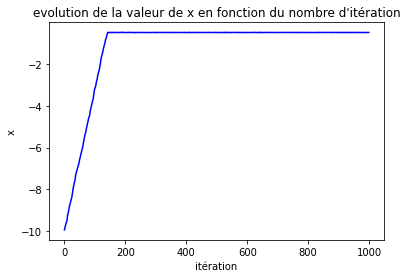

In [22]:
plt.figure()
plt.title("evolution de la valeur de x en fonction du nombre d'itération")
plt.xlabel("itération")
plt.ylabel("x")
plt.plot(list_values_algo_6,color="b")
plt.show()

Etude d'une autre fonction d'optimisation Schaffer-2D : 
$f(x,y) = 0.5 + \frac{sin^2(x^2 - y^2) - 0.5}{[1 + 0.001*(x^2 + y^2)]^2}$\
source : https://www.sfu.ca/~ssurjano/schaffer2.html

Le minimum de cette fonction se situe en $(0,0)$

In [5]:
def schaffer2D(x,y):
    return 0.5 + ( (np.sin(x**2 - y**2)**2 - 0.5) / (1 + (0.001*(x**2 + y**2)))**2 )

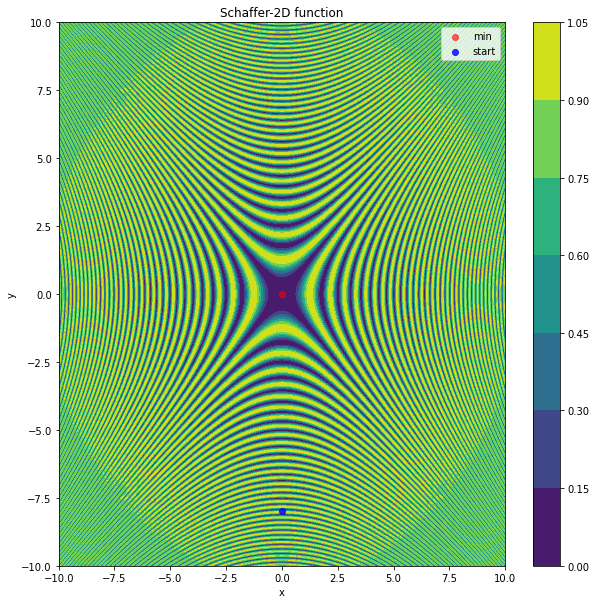

In [120]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)

X,Y = np.meshgrid(x, y)
Z = schaffer2D(X, Y) 


plt.figure(figsize = (10,10))
plt.title("Schaffer-2D function")
plt.xlabel("x")
plt.ylabel("y")

plt.contourf(X,Y,Z)
plt.colorbar(orientation="vertical")
plt.scatter([0],[0],c="r",alpha=0.6,label="min")
plt.scatter([0],[-8],c="b",alpha=0.8,label="start")
plt.legend()
plt.show()

In [106]:
NB_EVALUATION = 1000 # Nombre d'itération de notre algorithme
SIGMA = 0.03 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
NB_CHILD = 200
RO = 0.1 # proportion de meilleurs solutions à utiliser pour la mise a jour -> 10%

In [112]:
# Initialisation

list_values_algo_6 = []
start = np.asarray([0,-8])

# génération de NB_CHILD individus avec une valeur autour de start
x = np.asarray([start + np.random.normal(0,SIGMA) for j in range(NB_CHILD)], dtype=np.float32)

for i in tqdm(range(NB_EVALUATION)):

    
    # choisir les meilleurs individus
    list_sorted = sorted(range(len(x)), key=lambda i: schaffer2D(x[:,0],x[:,1])[i],reverse=True)
    x_index_values = list_sorted[-int(len(x)*RO):]
    
    min_value_index = list_sorted[-1:]
    
    list_values_algo_6.append(x[min_value_index,:])
    
    x = np.asarray([x[x_index,:] for x_index in x_index_values],dtype=np.float32)
    
    mean = np.asarray([x[:,0].mean(),x[:,1].mean()])
    
    variance = np.asarray([x[:,0].std(),x[:,1].std()]) + SIGMA
    
    # Génération des enfants avec 
    x = np.asarray([np.random.normal(mean[0], variance[0], NB_CHILD),np.random.normal(mean[0], variance[0], NB_CHILD)]).T
    

final_value = list_values_algo_6[-1][0]
print(f"Valeur {np.round(final_value,5)} atteinte en {NB_EVALUATION} itérations")

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 353.46it/s]

Valeur [-0.00011 -0.00135] atteinte en 1000 itérations


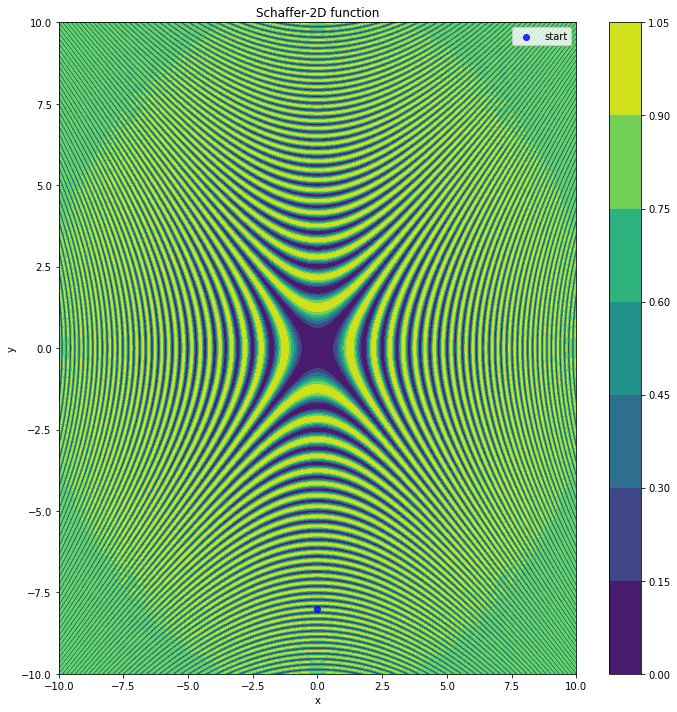

In [124]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)

X,Y = np.meshgrid(x, y)
Z = schaffer2D(X, Y) 


plt.figure(figsize = (10,10))
plt.title("Schaffer-2D function")
plt.xlabel("x")
plt.ylabel("y")

plt.contourf(X,Y,Z)
plt.colorbar(orientation="vertical")
plt.scatter([0],[-8],c="b",alpha=0.8,label="start")

ln = plt.scatter(final_value[0],final_value[1],c="r",alpha=0.8,label="final_value")
# ln.remove()
Génération
plt.legend()

### Génération de la vidéo de démonstration de l'algorithme (ne pas lancer car prend du temps)

Voir la vidéo du résultat ci-dessous

In [104]:
from IPython.display import Video
Video("CEM.mp4")

In [4]:
import matplotlib.cm as cm
import matplotlib.animation as animation

In [5]:
NB_EVALUATION =300 # Nombre d'itération de notre algorithme
SIGMA = 0.05 # La variance que nous allons appliquer sur nos données parents pour générer des enfants
NB_CHILD = 100
RO = 0.05 # proportion de meilleurs solutions à utiliser pour la mise a jour -> 10%

NameError: name 'X' is not defined

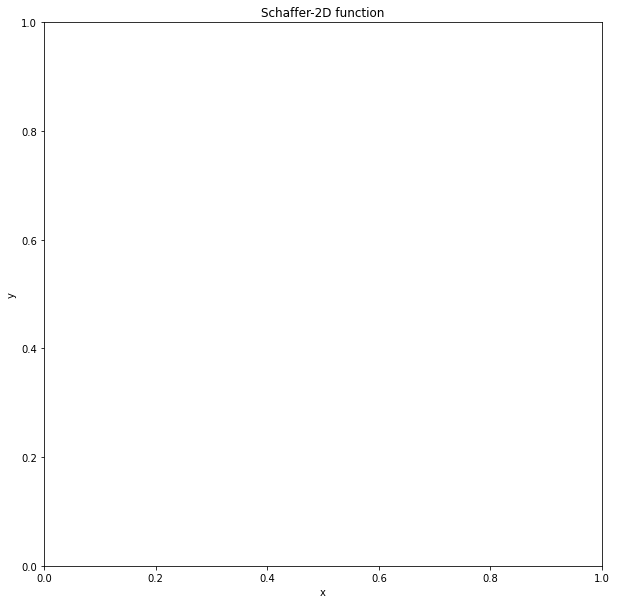

In [6]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Démonstration de l\'algorithme CEM sur Schaffer-2D', artist='Matplotlib',
        comment='CEM')
writer = FFMpegWriter(fps=6, metadata=metadata)

fig = plt.figure(figsize = (10,10))

start = np.asarray([-8,-8])

plt.title("Schaffer-2D function")
plt.xlabel("x")
plt.ylabel("y")

plt.contourf(X,Y,Z)
plt.colorbar(orientation="vertical")
ln_mean = plt.scatter(start[0],start[1],c="b",alpha=0.8,label="moyenne")

plt.legend()


with writer.saving(fig, "CEM.mp4", 100):

    # génération de NB_CHILD individus avec une valeur autour de start
    x = np.asarray([start + np.random.normal(0,SIGMA) for j in range(NB_CHILD)], dtype=np.float32)

    ln_child = plt.scatter(x[:,0],x[:,1],alpha=0.4,label="enfants")
    
    for i in tqdm(range(NB_EVALUATION)):


        # choisir les meilleurs individus
        list_sorted = sorted(range(len(x)), key=lambda i: schaffer2D(x[:,0],x[:,1])[i],reverse=True)
        x_index_values = list_sorted[-int(len(x)*RO):]

        min_value_index = list_sorted[-1:]
        min_value = x[min_value_index,:]

        x = np.asarray([x[x_index,:] for x_index in x_index_values],dtype=np.float32)

        mean = np.asarray([x[:,0].mean(),x[:,1].mean()])

        variance = np.asarray([x[:,0].std(),x[:,1].std()]) + SIGMA

        
        # Génération des enfants avec 
        x = np.asarray([np.random.normal(mean[0], variance[0], NB_CHILD),np.random.normal(mean[0], variance[0], NB_CHILD)]).T
        
        # Enregistrement

        ln_child.remove()
        ln_child = plt.scatter(x[:,0],x[:,1],alpha=0.2,c="b",label="enfants")
        
        ln_mean.remove()
        ln_mean = plt.scatter(mean[0],mean[1],c="r",alpha=0.8,label="moyenne")
        
        plt.legend()
        # enregistrement de la frame
        writer.grab_frame()

final_value = min_value
print(f"Valeur {np.round(final_value,5)} atteinte en {NB_EVALUATION} itérations")

## Co-variance Matrix Adaptation Evolution Strategy (CMA-ES) (en cours....)

Source : https://arxiv.org/pdf/1604.00772.pdf

Hyper parameters

In [4]:
from tqdm import tqdm

In [5]:
min_obj_function = 0
def obj_function(x,y) :
    return abs(min_obj_function - x**2 + y**2)

In [6]:
list_log = []

# SET PARAMETERS
NB_EVALUATION = 10
N = 2
g = 0
LAMBDA = 10 * N# int(4+np.floor(3*np.log(N)))
m = np.asarray([-80,-80],dtype=np.float32).reshape((N,1))
MU = int(np.floor(LAMBDA/2))
SIGMA = 0.5
weights = np.asarray(sorted([np.log(((MU + 1) /2 ) - np.log(i)) for i in range(1,MU+1)]))
weights /= weights.sum()
MUEFF =  weights[np.arange(MU)].sum()**2 / (weights[np.arange(MU)]**2).sum()


c_sigma =  (MUEFF + 2) / (N + MUEFF + 5)
d_sigma = 1 + (2 * max(0,np.sqrt( ( MUEFF-1 ) / ( N+1 ) )-1 ) )+ c_sigma

stopfitness = np.array([0,0])

c_c =  (4 + (MUEFF/N) ) / (N + 4 + (2*MUEFF/N))
alpha_cov = 2
c_1 =  alpha_cov / ( (N + 1.3)**2 + MUEFF )
c_mu = MUEFF / N**2 # min(1 - c_1, alpha_cov * ( (MUEFF - 2 + (1/MUEFF)) / ( (N+2)**2 + (alpha_cov*MUEFF/2))))

E_N = np.sqrt(N) * (1 - (1/4*N) + (1/(21 * (N**2)))   )

p_sigma = np.zeros((N,1))
p_c = np.zeros((N,1))

D = np.eye(N)
B = np.eye(N)

C = B @ D @ (B @ D).T

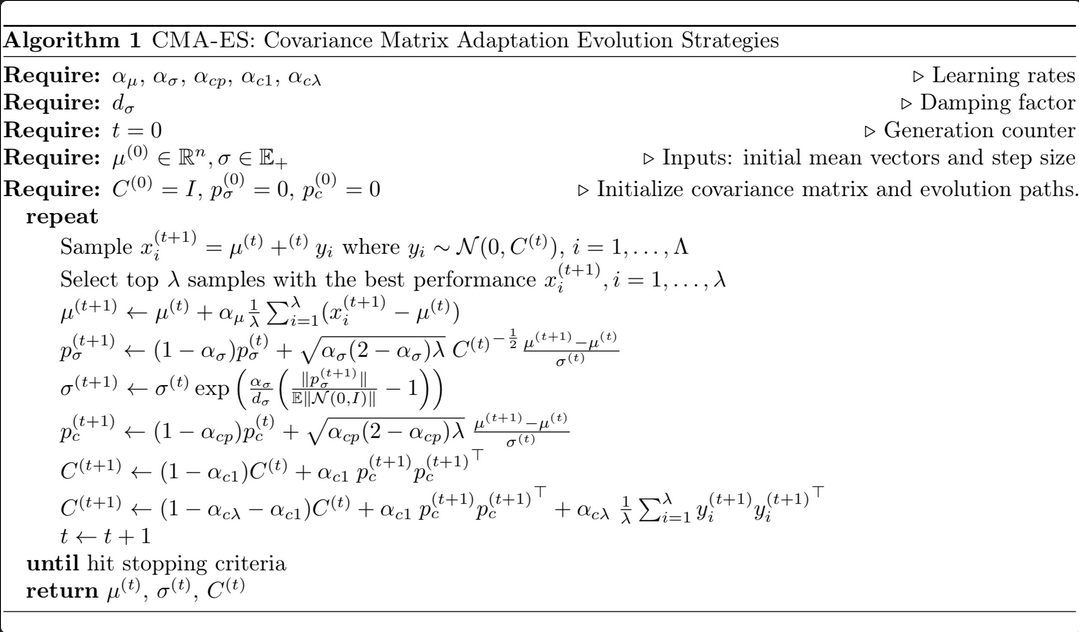

In [32]:
list_log = []

# SET PARAMETERS
NB_EVALUATION = 10
N = 2
g = 0
LAMBDA = 10 * N# int(4+np.floor(3*np.log(N)))
m = np.asarray([80,80],dtype=np.float32).reshape((N,1))
MU = int(np.floor(LAMBDA/2))
SIGMA = 0.5
weights = np.asarray(sorted([np.log(((MU + 1) /2 ) - np.log(i)) for i in range(1,MU+1)]))
weights /= weights.sum()
MUEFF =  weights[np.arange(MU)].sum()**2 / (weights[np.arange(MU)]**2).sum()


c_sigma =  (MUEFF + 2) / (N + MUEFF + 5)
d_sigma = 1 + (2 * max(0,np.sqrt( ( MUEFF-1 ) / ( N+1 ) )-1 ) )+ c_sigma

stopfitness = np.array([0,0])

c_c =  (4 + (MUEFF/N) ) / (N + 4 + (2*MUEFF/N))
alpha_cov = 2
c_1 =  alpha_cov / ( (N + 1.3)**2 + MUEFF )
c_mu = MUEFF / N**2 # min(1 - c_1, alpha_cov * ( (MUEFF - 2 + (1/MUEFF)) / ( (N+2)**2 + (alpha_cov*MUEFF/2))))

E_N = np.sqrt(N) * (1 - (1/4*N) + (1/(21 * (N**2)))   )

p_sigma = np.zeros((N,1))
p_c = np.zeros((N,1))

D = np.eye(N)
B = np.eye(N)

C = B @ D @ (B @ D).T


invsqrtC = B @ np.linalg.inv(D) @ B.T
g = 0

print(weights)
for i in tqdm(range(NB_EVALUATION)): 
    
    M = B @ D
    
    z = np.random.multivariate_normal(np.zeros(N), np.eye(N), size=LAMBDA)
    
    
    y = []
    for index in range(len(z)) :
        y.append((z[index].reshape((1,N)) @ M).reshape(N))# np.asarray([.reshape((N,1)) ],dtype=np.float32)  
    y = np.asarray(y)
    
    x = m.T + SIGMA * y
    
    list_sorted = sorted(range(len(x)), key=lambda i: obj_function(x[:,0],x[:,1])[i],reverse=True)
    x_index_values = list_sorted[-int(MU):]
    g += LAMBDA
    """
    print("test -----------------------------------------------------------------------------------: ")
    print("len(list_sorted)  : ",len(list_sorted) )
    print("x : ",x)
    print("x_index_values schaffer2D : ",obj_function(x[np.arange(LAMBDA)][:,0] , x[np.arange(LAMBDA)][:,1]))
    print("x_index_values : ",x_index_values)
    print("x[x_index_values] : ",x[x_index_values])
    print("schaffer2D : ",obj_function(x[x_index_values][:,0] , x[x_index_values][:,1]))
    """
    
    
    # print(schaffer2D(x[list_sorted[-int(LAMBDA):],0],x[list_sorted[-int(LAMBDA):],1]))
    # print(schaffer2D(x[x_index_values,0],x[x_index_values,1]))
    
    X_W = np.asarray([x[x_index_values[i],:] * weights[i] for i in range(len(x_index_values))],dtype=np.float32)
    Y_W = np.asarray([y[x_index_values[i],:] * weights[i] for i in range(len(x_index_values))],dtype=np.float32)
    Z_W = np.asarray([(M @ z[x_index_values[i]].reshape((N,1))).reshape(N) * weights[i] for i in range(len(x_index_values))],dtype=np.float32)  
    Z_W_ = np.asarray([(z[x_index_values[i]].reshape((N,1))).reshape(N) * weights[i] for i in range(len(x_index_values))],dtype=np.float32)
    Z = np.asarray([z[x_index_values[i]] for i in range(len(x_index_values))],dtype=np.float32)  
    
    
    x_sorted = np.asarray(x[x_index_values]).reshape((MU,N))
    x_diff = x_sorted - m.T
    x_mean = np.multiply(x_diff,weights.reshape((MU,1))).sum(axis=0).reshape((N,1))
    
    # print("def : ",x_mean.shape,x_mean)
    
    n_m =  m + x_mean
    
    
    print("n_m = ",n_m)
    
    
    
    # m + np.asarray([weights[i] * (x[x_index_values[i],:] - m) for i in range(len(x_index_values))]).sum(axis=0)# m +  (x[x_index_values] - m) .mean(axis=0)
    # m + np.asarray([weights[i] * (x[x_index_values[i],:] - m) for i in range(len(x_index_values))]).sum(axis=0)# X_W.sum(axis=0) / SIGMA# 
    y_mean = x_mean / SIGMA
    # print(n_m , m)

    
    
    p_sigma = (1 - c_sigma) * p_sigma 
    
    # h_sigma = np.linalg.norm(p_sigma) >= 0 and np.linalg.norm(p_sigma) <= 1.5 * np.sqrt(N) #  / np.sqrt(1 - (1 - c_sigma)**(2*g/LAMBDA) ) / E_N < 1.4 + (2 / (N+1))
    
    
    p_sigma +=  np.sqrt(c_sigma * (2 - c_sigma) * MUEFF) * invsqrtC @ (n_m.reshape((N,1)) - m.reshape((N,1)))/SIGMA# (B @ Z_W_.sum(axis=0)).reshape((N,1)) # * (n_m - m)/SIGMA # (n_m - m).reshape((N,1))/SIGMA# * (B @ Z_W_.sum(axis=0).reshape((N,1)))   
    
    
    # print(h_sigma)
    h_sigma = ( np.linalg.norm(p_sigma) / np.sqrt(1 - (1 - c_sigma)**(2*(g+1)) ) ) < (1.4 + (2 / (N+1))) * E_N
    
    #print("ee : ",p_sigma.shape)
    
    
    nSIGMA = SIGMA * np.exp( (c_sigma/d_sigma) * ( (np.linalg.norm(p_sigma)/  E_N  )  -1  )  ) # ok
    
    
    
    
    p_c = (1 - c_c) * p_c 
    #p_c += h_sigma * np.sqrt(  c_c * (2 - c_c) * MUEFF  ) * Y_W.sum(axis=0).reshape((N,1)) * (n_m - m).reshape((N,1))/SIGMA # (B @ D @ Z_W_.sum(axis=0)).reshape((N,1)) # Z_W.sum(axis=0)
    
    print("pc shape",p_c.shape)
    
    p_c += h_sigma * np.sqrt(  c_c * (2 - c_c) * MUEFF  ) * (n_m.reshape((N,1)) - m.reshape((N,1)))/SIGMA # (np.asarray([weights[i] * (x[x_index_values[i],:].reshape((N,1)) - m.reshape((N,1)))/SIGMA for i in range(len(x_index_values))]).sum(axis=0)).reshape((N,1)) # (n_m - m)/SIGMA
    
    # p_c += np.sqrt(  c_c * (2 - c_c) * MUEFF  ) * y_mean#  (np.asarray([weights[i] * (x[x_index_values[i],:] - m) for i in range(len(x_index_values))]).sum(axis=0)/SIGMA).reshape((N,1)) 
    

    
    
    
    #if h_sigma :
        # p_c += np.sqrt(  c_c * (2 - c_c) * MUEFF  ) * Y_W.sum(axis=0)

        
    # c_s = (1 - h_sigma * (np.linalg.norm(p_sigma))**2) * c_1 * c_c * (2 - c_c)   
    
    # E = ((x[x_index_values] - m)/SIGMA) .reshape((N,MU))
    
    
    
    
    """
    p_C = (
            (1 - c_c) * p_c +
            tf.sqrt(c_c * (2 - c_c) * MUEFF) * (n_m - m)/SIGMA
    )
    """
    
    nC = (1 - c_1)*C + (c_1 * (p_c @ p_c.T))
    ny = np.random.multivariate_normal(np.zeros(N), nC, size=LAMBDA)
    
    
    
    nx = n_m.T + nSIGMA * ny
    
    
    nlist_sorted = sorted(range(len(nx)), key=lambda i: obj_function(nx[:,0],nx[:,1])[i],reverse=True)
    nx_index_values = nlist_sorted[-int(MU):]
    
    part1 = (1 - c_1 - c_mu) * C
    part2 = c_1 * (p_c @ p_c.T)# ((p_c.reshape((N,1)) @ p_c.reshape((1,N)))) # + ( (1 - h_sigma) * c_c * (2 - c_c) * C) )
    # part3b =  c_mu * (B @ D @ Z.T) @ np.diag(weights) @ (B @ D @ Z.T).T
    part3 = np.zeros((N,N)) 
    for i in range(len(nx_index_values)) :
        """
        print("ny[x_index_values[i],:] : ",ny[nx_index_values[i],:])
        print("m : ",n_m.reshape(N))
        print("(ny[x_index_values[i],:]-m) : ",(ny[nx_index_values[i],:]-n_m.reshape(N)))
        """
        part3 += weights[i] * ( ny[nx_index_values[i],:].reshape((N,1)) @ ny[nx_index_values[i],:].reshape((1,N)) )
    part3 *= c_mu  
    
    
    
    
    """
    print("pc shape : ",p_c.shape)
    print("part2 shape : ",part2.shape)
    break
    
    C_m = tf.map_fn(
                fn=lambda e: e * tf.transpose(e),
                elems=(x_diff / SIGMA)[:, tf.newaxis],
            )
    # print("shape ",C_m.shape)
    y_s = tf.reduce_sum(tf.multiply(C_m, weights.reshape((MU,1,1))), axis=0)
    
    # print(y_s.shape)
    
    part3 = np.zeros((N,N))
    for i in range(len(x_index_values)):
        part3 += c_mu * y_s# (y_mean @ y_mean.T)# ( ((x[x_index_values[i]] - m)/SIGMA) .reshape((N,1)) @ ((x[x_index_values[i]] - m)/SIGMA) .reshape((1,N)) )
    """
    
    
    
    
    #delta_h_sigma = (1 - h_sigma) * c_c * (2 - c_c)
    
    print("part1 shape : ",part1)
    print("part2 shape : ",part2)
    print("part3 shape : ",part3)
    
    
    
    C = part1 + part2 + part3
    
    print("C : ",C)
        
    # D_inv = np.diag(np.reciprocal(np.diag(D)))
    # C_inv_squared = np.matmul(np.matmul(B, D_inv), B.T)
    
    #C_inv_squared_y = np.matmul(C_inv_squared, (np.asarray([weights[i] * (x[x_index_values[i],:] - m) for i in range(len(x_index_values))]).sum(axis=0)/SIGMA).reshape((N,1)))
    
    # C_inv_squared_y = np.matmul(C_inv_squared , y_mean)
    
    
    
    
    
    try :
        
        #u, v, _ = tf.linalg.svd(C)
        #diag_D = tf.sqrt(u)
        # D = tf.linalg.tensor_diag(diag_D)
        
        #print("diag_D : ",diag_D)
        # u, v, _ = tf.linalg.svd(C)

        #print(tf.sqrt(u))

        #if g - eigeneval > LAMBDA /(c_1 + c_mu)/ N / 10 :
        # igeneval = g
        C = np.triu(C) + np.triu(C,1).T # ; % enforce symmetry
        D,B = np.linalg.eigh(C)
        #print(" avant D : ",D)
        D = np.diag(np.sqrt(D))
        
        m = n_m
        SIGMA = nSIGMA
        
        print("m.shape : ",m.shape)
        print(" B : ",B)
        print(" D : ",D)
        
        invsqrtC = B @ np.linalg.inv(D) @ B.T
        
        
    except np.linalg.LinAlgError :
        print(C)
        print("error")
        break
    
    
    
    
    
    list_log.append(obj_function(m[0],m[1]))
    
    # print(SIGMA)
#print(X_W)
#print(SIGMA*Y_W.sum(axis=0))
print(m , obj_function(m[0],m[1]) )
print(C)
#print(C)

plt.figure()
plt.plot(list_log)
plt.show()

[0.08487255 0.08723984 0.08979846 0.09259472 0.09569498 0.09919958
 0.10327187 0.10820761 0.11464219 0.12447819]


  0%|                                                    | 0/10 [00:00<?, ?it/s]/tmp/ipykernel_7986/2671687301.py:237: RuntimeWarning: invalid value encountered in sqrt
  D = np.diag(np.sqrt(D))
 10%|████▎                                      | 1/10 [00:00<00:00, 149.68it/s]

n_m =  [[79.80696361]
 [79.88564028]]
pc shape (2, 1)
part1 shape :  [[-1.56039575 -0.        ]
 [-0.         -1.56039575]]
part2 shape :  [[0.1145858  0.06788358]
 [0.06788358 0.04021598]]
part3 shape :  [[0.63787112 0.4991743 ]
 [0.4991743  0.64183857]]
C :  [[-0.80793883  0.56705788]
 [ 0.56705788 -0.8783412 ]]
m.shape :  (2, 1)
 B :  [[-0.68485122 -0.72868293]
 [ 0.72868293 -0.68485122]]
 D :  [[nan  0.]
 [ 0. nan]]
n_m =  [[nan]
 [nan]]
pc shape (2, 1)


LinAlgError: SVD did not converge

# Natural Evolution Strategies (NES)

In [1]:
import torch
import torch.nn as nn

/home/jdufou1/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Algorithme : 

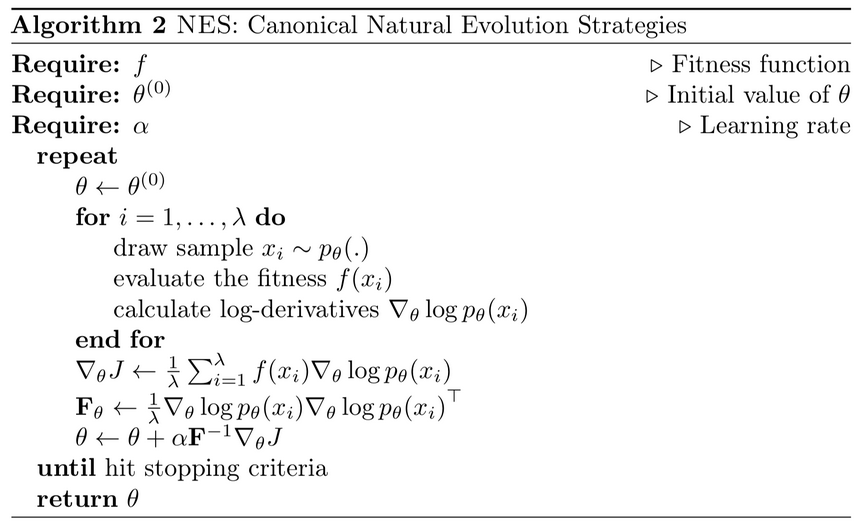

In [49]:
# Parameters :
nb_variable = 2
nb_neurons = 20
learning_rate = 1e-3
weight1 = torch.tensor(torch.randn(nb_variable,nb_neurons) , requires_grad=True)
weight2 = torch.tensor(torch.randn(nb_neurons,nb_variable) , requires_grad=True)
weight3 = torch.tensor(torch.randn(nb_neurons,1) , requires_grad=True)

min_f = 0
def fitness_function(x,y) : 
    return min_f - x**2 - y**2

def predict1(x,weight1,weight2):
    res1 = x @ weight1
    res2 = 1 / (1 + torch.exp(-res1)) # sigmoid
    res3 = res2 @ weight2
    return res3

def predict2(x,weight1,weight3):
    res1 = x @ weight1
    res2 = 1 / (1 + torch.exp(-res1)) # sigmoid
    res3 = res2 @ weight3
    return torch.tanh(res3)

nb_eval = 100
LAMBDA = 10
for step in range(nb_eval):
    
    print(step, predict1(torch.randn(1,nb_variable),weight1,weight2))
    
    Jweight1 = torch.zeros(weight1.shape)
    Jweight2 = torch.zeros(weight2.shape)
    Jweight3 = torch.zeros(weight3.shape)
    
    Fweight1 = torch.zeros(weight1.shape[0],weight1.shape[0])
    Fweight2 = torch.zeros(weight2.shape[0],weight2.shape[0])
    Fweight3 = torch.zeros(weight3.shape[0],weight3.shape[0])
    
    
    
    for i in range(LAMBDA):
        
        x = predict1(torch.randn(1,nb_variable),weight1,weight2)
        
        f = fitness_function(x[:,0],x[:,1])
        
        p = torch.log(predict2(x,weight1,weight3))
        
        p.backward()
        # d = torch.autograd.grad(outputs=p,inputs=(weight1,weight2,weight3))
               
        Jweight1 += f * weight1.grad# d[0]
        Jweight2 += f * weight2.grad
        Jweight3 += f * weight3.grad
        
        Fweight1 += weight1.grad @ weight1.grad.T
        Fweight2 += weight2.grad @ weight2.grad.T
        Fweight3 += weight3.grad @ weight3.grad.T
        
        weight1.grad.data.zero_()
        weight2.grad.data.zero_()
        weight3.grad.data.zero_()
        
        
    
    Jweight1 /= LAMBDA
    Jweight2 /= LAMBDA
    Jweight3 /= LAMBDA
    
    Fweight1 /= LAMBDA
    Fweight2 /= LAMBDA
    Fweight3 /= LAMBDA
    
    
    with torch.no_grad() :
        weight1 += learning_rate * (torch.linalg.inv(Fweight1+1e-9) @ Jweight1)
        weight2 += learning_rate * (torch.linalg.inv(Fweight2+1e-9) @ Jweight2)
        weight3 += learning_rate * (torch.linalg.inv(Fweight3+1e-9) @ Jweight3)
    
    
    


0 tensor([[ 0.4086, -0.6768]], grad_fn=<MmBackward0>)
1 tensor([[-0.8301,  0.6327]], grad_fn=<MmBackward0>)
2 tensor([[0.6994, 0.5825]], grad_fn=<MmBackward0>)
3 tensor([[-0.6601,  0.2681]], grad_fn=<MmBackward0>)
4 tensor([[0.3399, 0.9604]], grad_fn=<MmBackward0>)
5 tensor([[-0.7367,  0.5810]], grad_fn=<MmBackward0>)
6 tensor([[ 0.1216, -0.0083]], grad_fn=<MmBackward0>)
7 tensor([[-0.1328,  0.0108]], grad_fn=<MmBackward0>)
8 tensor([[0.2208, 1.2235]], grad_fn=<MmBackward0>)
9 tensor([[2.7657, 0.6190]], grad_fn=<MmBackward0>)
10 tensor([[ 0.0960, -0.2889]], grad_fn=<MmBackward0>)


/tmp/ipykernel_10681/3199971251.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight1 = torch.tensor(torch.randn(nb_variable,nb_neurons) , requires_grad=True)
/tmp/ipykernel_10681/3199971251.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight2 = torch.tensor(torch.randn(nb_neurons,nb_variable) , requires_grad=True)
/tmp/ipykernel_10681/3199971251.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  weight3 = torch.tensor(torch.randn(nb_neurons,1) , requires_grad=True)


_LinAlgError: torch.linalg.inv: The diagonal element 20 is zero, the inversion could not be completed because the input matrix is singular.

# Evolution strategies pour les environements RL

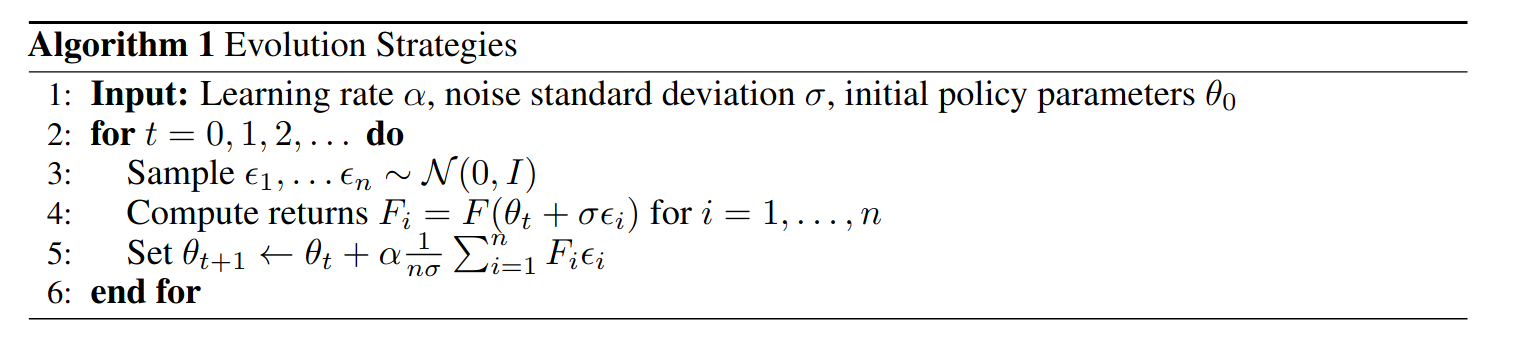

Source : https://arxiv.org/pdf/1703.03864.pdf

In [108]:
import matplotlib.pyplot as plt

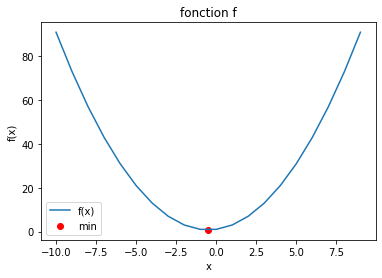

In [109]:
def f(x) :
    return x**2 + x + 1

x = np.arange(-10,10,1)
min_f = -1 / 2
plt.figure()
plt.title("fonction f")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x),label="f(x)")
plt.scatter(min_f,f(min_f),color="r",label="min")
plt.legend()
plt.show()

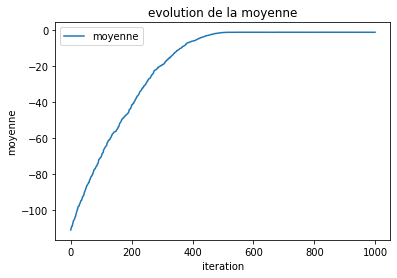

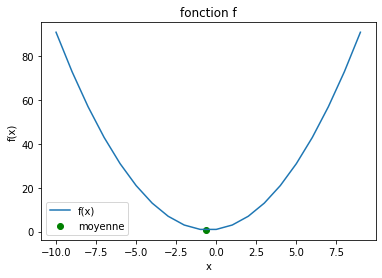

In [110]:
objectif = min_f
def f_obj(x,objectif) :
    return objectif - f(x)

learning_rate = 0.03
std = 0.8
param = 10
nb_eval = 1000
n = 2

list_param = []

for t in range(nb_eval) :
    samples = np.random.randn(n, 1)
    returns = f_obj((param + (std * samples)),objectif)
    A = ( returns - returns.mean() )/ returns.std() # assouplissement
    param += (learning_rate/(n*std)) * (A.T @ samples)[0]
    list_param.append(f_obj(param,objectif))
    
plt.figure()
plt.title("evolution de la moyenne")
plt.xlabel("iteration")
plt.ylabel("moyenne")
plt.plot(list_param,label="moyenne")
plt.legend()
plt.show()

plt.figure()
plt.title("fonction f")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x),label="f(x)")
plt.scatter(param,f(param), color="g",label="moyenne")
plt.legend()
plt.show()

Nous avons réussi à trouver le minimum d'une fonction basique, à présent, essayons donc maintenant avec l'environnement cartpole de gym

In [121]:
import gym
from collections import deque
from tqdm import tqdm
import random

In [122]:
env = gym.make('CartPole-v0')

In [123]:
list_max_rewards = []
list_mean_rewards = []

sigma = 0.8
learning_rate = 0.01


nb_obs = 4
nb_actions = 2
nb_neurons = 20

# Policy parameters

weight1 = np.random.randn(nb_obs,nb_neurons)
weight2 = np.random.randn(nb_neurons,nb_actions)

len_weight1 = nb_obs * nb_neurons
len_weight2 = nb_neurons * nb_actions

def predict(x,weight1,weight2):
    r1 = x @ weight1
    r2 = 1 / (1 + np.exp(-r1))
    r3 = r2 @ weight2
    return 1 / (1 + np.exp(-r3))

nb_samples = 20
nb_episode = 200

for i in tqdm(range(nb_episode)) : 
    
    sample = np.random.randn(nb_samples,len_weight1 + len_weight2)
    
    rewards = np.zeros(nb_samples)
    
    for j in range(nb_samples) : 
        
        # Mise a jour des poids
        
        weight1_modified = weight1 + sigma * sample[j,:len_weight1].reshape(weight1.shape)
        weight2_modified = weight2 + sigma * sample[j,len_weight1:].reshape(weight2.shape)
        
        done = False
        state = env.reset()

        while not done :
            
            actions = predict(state,weight1_modified,weight2_modified)
            best_action = np.argmax(actions)
            new_state,reward,done,_ = env.step(best_action)
            
            rewards[j] += reward
            state = new_state

    # Apprentissage
    
    F = (rewards - rewards.mean()).reshape((1,nb_samples))
    
    weight1 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,:len_weight1]).reshape(weight1.shape)
    weight2 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,len_weight1:]).reshape(weight2.shape)

    list_max_rewards.append(np.max(rewards))
    list_mean_rewards.append(np.mean(rewards))

100%|█████████████████████████████████████████| 200/200 [00:20<00:00,  9.53it/s]


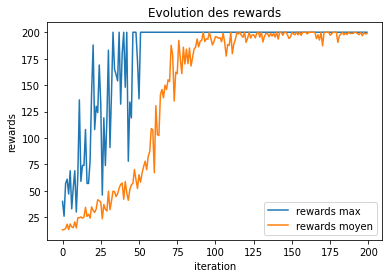

In [114]:
plt.figure()
plt.title("Evolution des rewards")
plt.xlabel("iteration")
plt.ylabel("rewards")
plt.plot(list_max_rewards,label="rewards max")
plt.plot(list_mean_rewards, label="rewards moyen")
plt.legend()
plt.show()

https://medium.com/swlh/evolution-strategies-844e2694e632

Essayons maintenant cette approche sur un environnement plus compliqué avec un espace continu d'action : humanoid-v2

In [78]:
env = gym.make("Walker2d-v2")
print("espace observable : ",env.observation_space)
print("espace d'action : ",env.action_space)

espace observable :  Box(-inf, inf, (17,), float64)
espace d'action :  Box(-1.0, 1.0, (6,), float32)


In [88]:
list_max_rewards = []
list_mean_rewards = []

sigma = 0.8
learning_rate = 0.01


nb_obs = 17
nb_actions = 6
nb_neurons_layer_1 = 100
nb_neurons_layer_2 = 100

# Policy parameters

weight1 = np.random.randn(nb_obs,nb_neurons_layer_1)
weight2 = np.random.randn(nb_neurons_layer_1,nb_neurons_layer_2)
weight3 = np.random.randn(nb_neurons_layer_2,nb_actions)

len_weight1 = nb_obs * nb_neurons_layer_1
len_weight2 = nb_neurons_layer_1 * nb_neurons_layer_2
len_weight3 = nb_neurons_layer_2 * nb_actions

def predict(x,weight1,weight2,weight3):
    r1 = x @ weight1
    r2 = 1 / (1 + np.exp(-r1))
    r3 = r2 @ weight2
    r4 = 1 / (1 + np.exp(-r3))
    r5 = r4 @ weight3
    return 1 / (1 + np.exp(-r5))

nb_samples = 100
nb_episode = 50

for i in tqdm(range(nb_episode)) : 
    
    sample = np.random.randn(nb_samples,len_weight1 + len_weight2 + len_weight3)
    
    rewards = np.zeros(nb_samples)
    
    for j in range(nb_samples) : 
        
        # Mise a jour des poids
        
        weight1_modified = weight1 + sigma * sample[j,:len_weight1].reshape(weight1.shape)
        weight2_modified = weight2 + sigma * sample[j,len_weight1:len_weight1+len_weight2].reshape(weight2.shape)
        weight3_modified = weight3 + sigma * sample[j,len_weight1+len_weight2:].reshape(weight3.shape)
        
        done = False
        state = env.reset()

        while not done :
            
            action = predict(state,weight1_modified,weight2_modified,weight3_modified)
            best_action = action
            new_state,reward,done,_ = env.step(best_action)
            
            rewards[j] += reward
            state = new_state

    # Apprentissage
    
    F = (rewards - rewards.mean()).reshape((1,nb_samples))
    
    weight1 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,:len_weight1]).reshape(weight1.shape)
    weight2 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,len_weight1:len_weight1+len_weight2]).reshape(weight2.shape)
    weight3 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,len_weight1+len_weight2:]).reshape(weight3.shape)

    list_max_rewards.append(np.max(rewards))
    list_mean_rewards.append(np.mean(rewards))

100%|███████████████████████████████████████████| 50/50 [14:58<00:00, 17.96s/it]


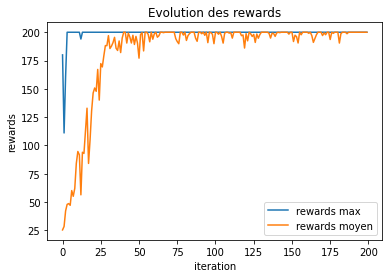

In [124]:
plt.figure()
plt.title("Evolution des rewards")
plt.xlabel("iteration")
plt.ylabel("rewards")
plt.plot(list_max_rewards,label="rewards max")
plt.plot(list_mean_rewards, label="rewards moyen")
plt.legend()
plt.show()

In [100]:
import flappy_bird_gym

env = flappy_bird_gym.make("FlappyBird-v0")
print("espace observable : ",env.observation_space)
print("espace d'action : ",env.action_space)
state = env.reset()
print(env._game.player_vel_y )

espace observable :  Box(-inf, inf, (2,), float32)
espace d'action :  Discrete(2)
-9


In [102]:
list_max_rewards = []
list_mean_rewards = []

sigma = 0.5
learning_rate = 0.001


nb_obs = 3
nb_actions = 2
nb_neurons_layer_1 = 100
nb_neurons_layer_2 = 100

# Policy parameters

weight1 = np.random.randn(nb_obs,nb_neurons_layer_1)
weight2 = np.random.randn(nb_neurons_layer_1,nb_neurons_layer_2)
weight3 = np.random.randn(nb_neurons_layer_2,nb_actions)

len_weight1 = nb_obs * nb_neurons_layer_1
len_weight2 = nb_neurons_layer_1 * nb_neurons_layer_2
len_weight3 = nb_neurons_layer_2 * nb_actions

def predict(x,weight1,weight2,weight3):
    r1 = x @ weight1
    r2 = 1 / (1 + np.exp(-r1))
    r3 = r2 @ weight2
    r4 = 1 / (1 + np.exp(-r3))
    r5 = r4 @ weight3
    return 1 / (1 + np.exp(-r5))

nb_samples = 150
nb_episode = 500

for i in tqdm(range(nb_episode)) : 
    
    sample = np.random.randn(nb_samples,len_weight1 + len_weight2 + len_weight3)
    
    rewards = np.zeros(nb_samples)
    
    for j in range(nb_samples) : 
        
        # Mise a jour des poids
        
        weight1_modified = weight1 + sigma * sample[j,:len_weight1].reshape(weight1.shape)
        weight2_modified = weight2 + sigma * sample[j,len_weight1:len_weight1+len_weight2].reshape(weight2.shape)
        weight3_modified = weight3 + sigma * sample[j,len_weight1+len_weight2:].reshape(weight3.shape)
        
        done = False
        [x,y] = env.reset()
        state = [x,y,env._game.player_vel_y]
        
        while not done :
            
            actions = predict(state,weight1_modified,weight2_modified,weight3_modified)
            best_action = np.argmax(actions)
            [x,y],reward,done,_ = env.step(best_action)
            
            rewards[j] += reward
            state = [x,y,env._game.player_vel_y]

    # Apprentissage
    
    F = (rewards - rewards.mean()).reshape((1,nb_samples))
    
    weight1 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,:len_weight1]).reshape(weight1.shape)
    weight2 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,len_weight1:len_weight1+len_weight2]).reshape(weight2.shape)
    weight3 += (learning_rate/(nb_samples * sigma)) * np.dot(F,sample[:,len_weight1+len_weight2:]).reshape(weight3.shape)

    list_max_rewards.append(np.max(rewards))
    list_mean_rewards.append(np.mean(rewards))

100%|█████████████████████████████████████████| 500/500 [07:17<00:00,  1.14it/s]


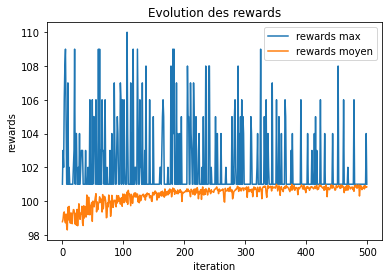

In [103]:
plt.figure()
plt.title("Evolution des rewards")
plt.xlabel("iteration")
plt.ylabel("rewards")
plt.plot(list_max_rewards,label="rewards max")
plt.plot(list_mean_rewards, label="rewards moyen")
plt.legend()
plt.show()

Nous voyons que la simple version d'ES n'est pas assez robuste pour le jeu du flappy bird car la politique tombe dans un optimal local

# Novelty Search Evolution Strategies (NS-ES)

Source : https://arxiv.org/pdf/1712.06560.pdf